In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
results = pd.read_csv("/d/hpc/projects/FRI/DL/mo6643/MSC/cross_species_prediction/transVAE_seml/results/results161123_CT.csv")

In [8]:
groups = results.groupby(["addl_dataset", "hidden_layers", "layers", "dropout_rate", "weight_decay"])
groups_mean = groups.mean(numeric_only=True)
groups_mean = groups_mean.reset_index()
#groups_extra.mean(numeric_only=True)[['result.r2_dbdb_healthy', 'result.r2_dbdb_OOD',
#                                'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD']].sort_values("result.r2_dbdb_OOD", ascending=False)

In [5]:
results.columns

Index(['Unnamed: 0', 'addl_dataset', 'hidden_layers', 'latent_dim',
       'learning_rate', 'cov_embed_dim', 'max_epochs', 'layers',
       'dropout_rate', 'kl_divergence_weight', 'weight_decay', 'seed',
       'r2_dbdb', 'shared_top_genes_dbdb', 'scores_corr_dbdb',
       'pvals_adj_corr_dbdb', 'scores_ranks_corr_dbdb',
       'shared_top_genes_dbdb_pancreatic_A_cell',
       'scores_corr_dbdb_pancreatic_A_cell',
       'pvals_adj_corr_dbdb_pancreatic_A_cell',
       'scores_ranks_corr_dbdb_pancreatic_A_cell',
       'shared_top_genes_dbdb_pancreatic_D_cell',
       'scores_corr_dbdb_pancreatic_D_cell',
       'pvals_adj_corr_dbdb_pancreatic_D_cell',
       'scores_ranks_corr_dbdb_pancreatic_D_cell',
       'shared_top_genes_dbdb_type_B_pancreatic_cell',
       'scores_corr_dbdb_type_B_pancreatic_cell',
       'pvals_adj_corr_dbdb_type_B_pancreatic_cell',
       'scores_ranks_corr_dbdb_type_B_pancreatic_cell', 'r2_mSTZ',
       'shared_top_genes_mSTZ', 'scores_corr_mSTZ', 'pvals_adj_c

In [12]:
groups_mean = groups_mean.drop("Unnamed: 0", axis = 1)

In [13]:
groups_mean

,addl_dataset,hidden_layers,layers,dropout_rate,weight_decay,latent_dim,learning_rate,cov_embed_dim,max_epochs,kl_divergence_weight,...,pvals_adj_corr_mSTZ_pancreatic_A_cell,scores_ranks_corr_mSTZ_pancreatic_A_cell,shared_top_genes_mSTZ_pancreatic_D_cell,scores_corr_mSTZ_pancreatic_D_cell,pvals_adj_corr_mSTZ_pancreatic_D_cell,scores_ranks_corr_mSTZ_pancreatic_D_cell,shared_top_genes_mSTZ_type_B_pancreatic_cell,scores_corr_mSTZ_type_B_pancreatic_cell,pvals_adj_corr_mSTZ_type_B_pancreatic_cell,scores_ranks_corr_mSTZ_type_B_pancreatic_cell
0,embedding_top100_mouse_3000hvg.h5ad.h5ad,1000,6,0.3,0.0001,512.0,0.0001,10.0,1500.0,0.005,...,0.019620,0.263485,0.401000,0.099216,0.007646,0.104543,0.259333,0.070407,-0.005101,0.091082
1,embedding_top100_mouse_3000hvg.h5ad.h5ad,1000,6,0.3,0.0010,512.0,0.0001,10.0,1500.0,0.005,...,-0.013436,0.264159,0.406333,0.097394,-0.011220,0.101294,0.260000,0.069923,-0.037315,0.095591
2,embedding_top100_mouse_3000hvg.h5ad.h5ad,1000,6,0.4,0.0001,512.0,0.0001,10.0,1500.0,0.005,...,-0.010258,0.249807,0.398667,0.097384,0.010178,0.115844,0.256000,0.064953,-0.018328,0.098893
3,embedding_top100_mouse_3000hvg.h5ad.h5ad,1000,6,0.4,0.0010,512.0,0.0001,10.0,1500.0,0.005,...,-0.014691,0.253014,0.396667,0.091889,0.004143,0.117012,0.260000,0.057856,-0.039590,0.107509
4,embedding_top100_mouse_3000hvg.h5ad.h5ad,1000,8,0.3,0.0001,512.0,0.0001,10.0,1500.0,0.005,...,0.007974,0.225860,0.396000,0.082334,0.078103,0.106962,0.255333,0.069421,-0.013063,0.103282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,train_adata_baseline_3000hvg.h5ad.h5ad,1000,6,0.4,0.0010,512.0,0.0001,10.0,1500.0,0.005,...,-0.045527,0.177253,0.394333,0.122096,0.047345,0.126954,0.229000,-0.017582,-0.077173,0.031686
156,train_adata_baseline_3000hvg.h5ad.h5ad,1000,8,0.3,0.0001,512.0,0.0001,10.0,1500.0,0.005,...,-0.012235,0.196971,0.404333,0.138567,-0.013439,0.117998,0.219333,-0.023115,-0.053606,0.033668
157,train_adata_baseline_3000hvg.h5ad.h5ad,1000,8,0.3,0.0010,512.0,0.0001,10.0,1500.0,0.005,...,-0.014439,0.127905,0.363500,0.099672,0.007707,0.105290,0.262500,-0.020935,-0.046079,0.023954
158,train_adata_baseline_3000hvg.h5ad.h5ad,1000,8,0.4,0.0001,512.0,0.0001,10.0,1500.0,0.005,...,0.005034,0.112737,0.324000,0.070678,-0.005187,0.014148,0.293667,-0.006996,-0.006532,0.067849


In [18]:
column

'shared_top_genes_dbdb'

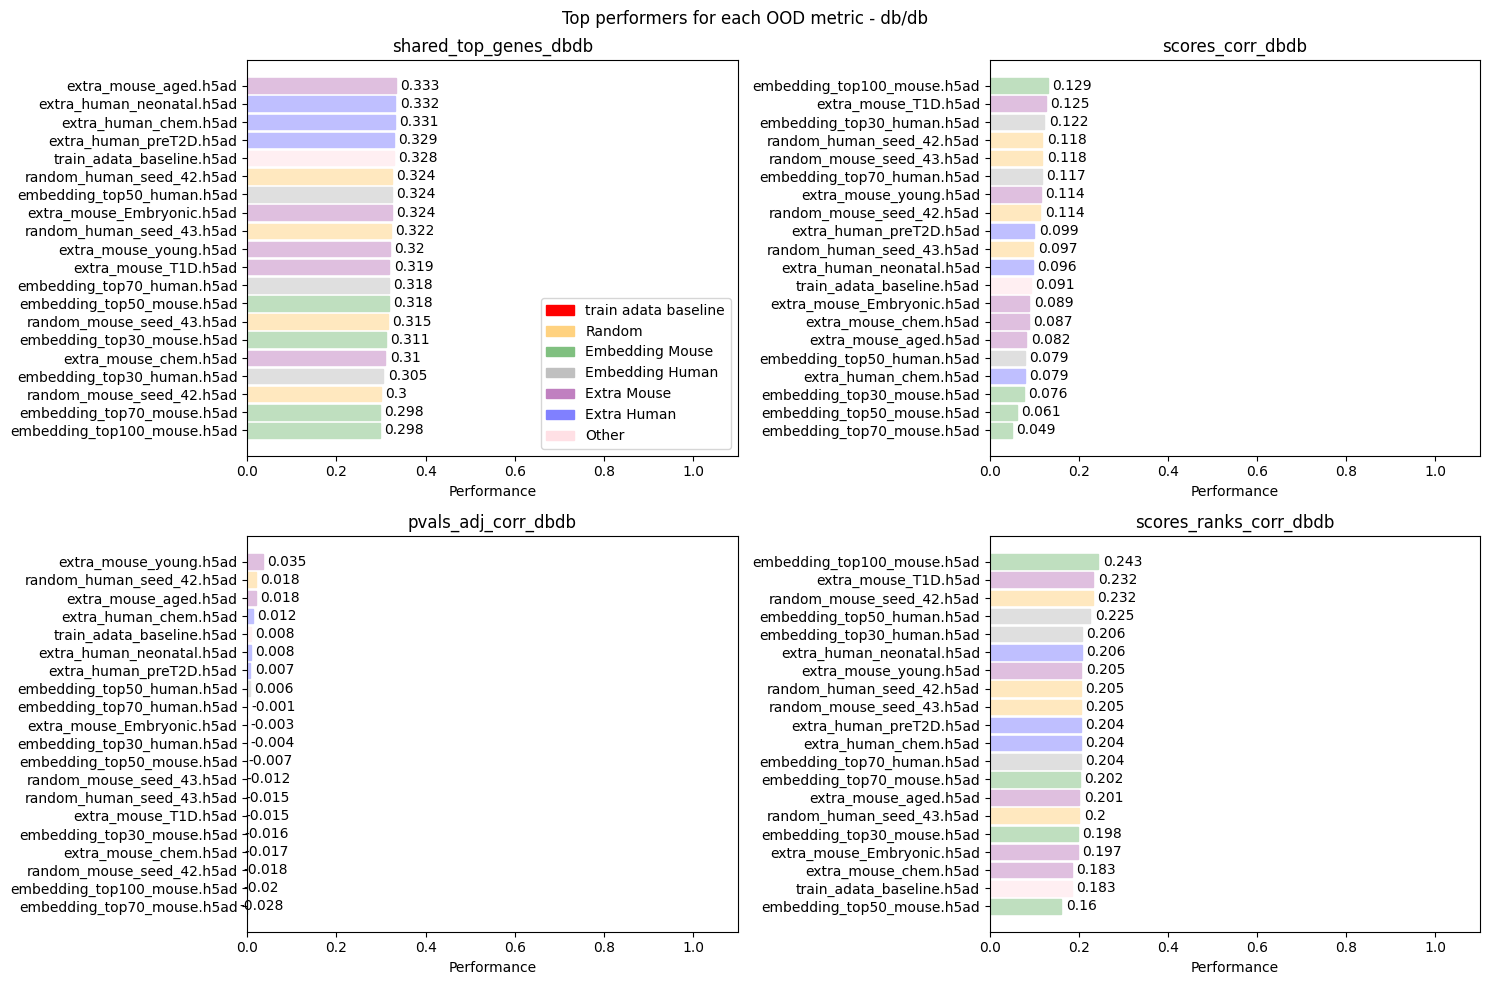

In [20]:
import matplotlib.pyplot as plt

top_performers = {}

tested_data = ['shared_top_genes_dbdb', 'scores_corr_dbdb', 'pvals_adj_corr_dbdb', 'scores_ranks_corr_dbdb']

for column in tested_data:
    top_performers[column] = []
    for dataset in groups_mean["addl_dataset"].unique():
        tmp_results = groups_mean[groups_mean["addl_dataset"] == dataset][column]
        top_row = tmp_results.nlargest(1)
        top_index = top_row.index[0]
        top_value = top_row.values[0]
        
        top_performers[column].append((dataset, top_value))

    top_performers[column].sort(key=lambda x: x[1], reverse=False)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.patches as mpatches

# Assuming top_performers is your original dict of datasets

# Define base colors for each group
base_colors = {
    'random': 'orange',
    'embedding_mouse': 'green',
    'embedding_human': 'grey',
    'extra_mouse': 'purple',
    'extra_human': 'blue',
    'other': 'pink',  # For datasets that don't fit into the above categories
}

# Helper function to lighten a color
def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = np.array(mcolors.to_rgb(c))
    return mcolors.to_hex((1 - amount) * c + amount * np.array([1, 1, 1]))

# Create a color map for all possible labels in the top_performers dict
color_map = {}
for performers in top_performers.values():
    for name, _ in performers:
        short_name = name.replace('_3000hvg.h5ad', '')
        if 'random' in short_name:
            group_color = 'random'
        elif 'embedding' in short_name and 'mouse' in short_name:
            group_color = 'embedding_mouse'
        elif 'embedding' in short_name and 'human' in short_name:
            group_color = 'embedding_human'
        elif 'extra' in short_name and 'human' in short_name:
            group_color = 'extra_human'
        elif 'extra' in short_name and 'mouse' in short_name:
            group_color = 'extra_mouse'
        else:
            group_color = 'other'
        color_map[short_name] = lighten_color(base_colors[group_color], amount=0.75)

# Explicitly color 'train_adata_baseline' in red
color_map['train_adata_baseline'] = 'red'

# Use the dictionary to create a legend
legend_handles = [
    mpatches.Patch(color=color_map['train_adata_baseline'], label='train adata baseline'),
    mpatches.Patch(color=lighten_color(base_colors['random']), label='Random'),
    mpatches.Patch(color=lighten_color(base_colors['embedding_mouse']), label='Embedding Mouse'),
    mpatches.Patch(color=lighten_color(base_colors['embedding_human']), label='Embedding Human'),
    mpatches.Patch(color=lighten_color(base_colors['extra_mouse']), label='Extra Mouse'),
    mpatches.Patch(color=lighten_color(base_colors['extra_human']), label='Extra Human'),
    mpatches.Patch(color=lighten_color(base_colors['other']), label='Other'),
]

# Plotting in one figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes_flat = axes.flatten()

for ax, (column, performers) in zip(axes_flat, top_performers.items()):
    labels, values = zip(*performers)
    cleaned_labels = [label.replace('_3000hvg.h5ad', '') for label in labels]
    #col_name = column.split(".")[1]
    #col_name = " ".join(col_name.split("_")[:-1])
    col_name = column
    
    # Create horizontal bars
    bars = ax.barh(cleaned_labels, values)

    # Color the bars using the color map
    for bar, label in zip(bars, cleaned_labels):
        bar.set_color(color_map[label])

    ax.set_title(col_name)
    ax.set_xlabel('Performance')
    ax.set_yticks(range(len(cleaned_labels)))
    ax.set_yticklabels(cleaned_labels)

    ax.set_xlim([0, 1.1])  # Adjust the x-axis limit to fit your data

    # Adding values on the side of the bars
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval + 0.01, bar.get_y() + bar.get_height() / 2, round(xval, 3), va='center')

# Add the legend to the last subplot for clarity
axes_flat[0].legend(handles=legend_handles, loc='lower right')

plt.suptitle('Top performers for each OOD metric - db/db') 
plt.tight_layout()
#plt.savefig("./fig_021123//OOD_metrics_dbdb.png")
plt.show()
